## 07-09 케라스의 함수형 API(Keras Functional API)

앞서 케라스 훑어보기 실습에서 배운 케라스의 모델 설계 방식은 Sequential API을 사용한 것입니다. 그런데 Sequential API는 여러층을 공유하거나 다양한 종류의 입력과 출력을 사용하는 등의 복잡한 모델을 만드는 일에는 한계가 있습니다. 이번에는 더욱 복잡한 모델을 생성할 수 있는 방식인 Functional API(함수형 API)에 대해서 알아봅니다.

### Sequential API로 만든 모델

Sequential API로 만든 모델은 직관적이고 편리하지만 단순히 층을 쌓는 것만으로는 구현할 수 없는 복잡한 신경망을 구현할 수 없습니다. 따라서 초심자에게 적합한 API이지만, 전문가가 되기 위해서는 결과적으로 Functional API를 학습해야 합니다.

### Functional API로 만든 모델

Functional API는 각 층을 일종의 함수(function)로서 정의합니다. 그리고 각 함수를 조합하기 위한 연산자들을 제공하는데, 이를 이용하여 신경망을 설계합니다. Functional API로 FFNN, RNN 등 다양한 모델을 만들면서 기존의 sequential API와의 차이를 이해해봅시다.

1. 전결합 피드 포워드 신경망(Fully-connected FFNN)

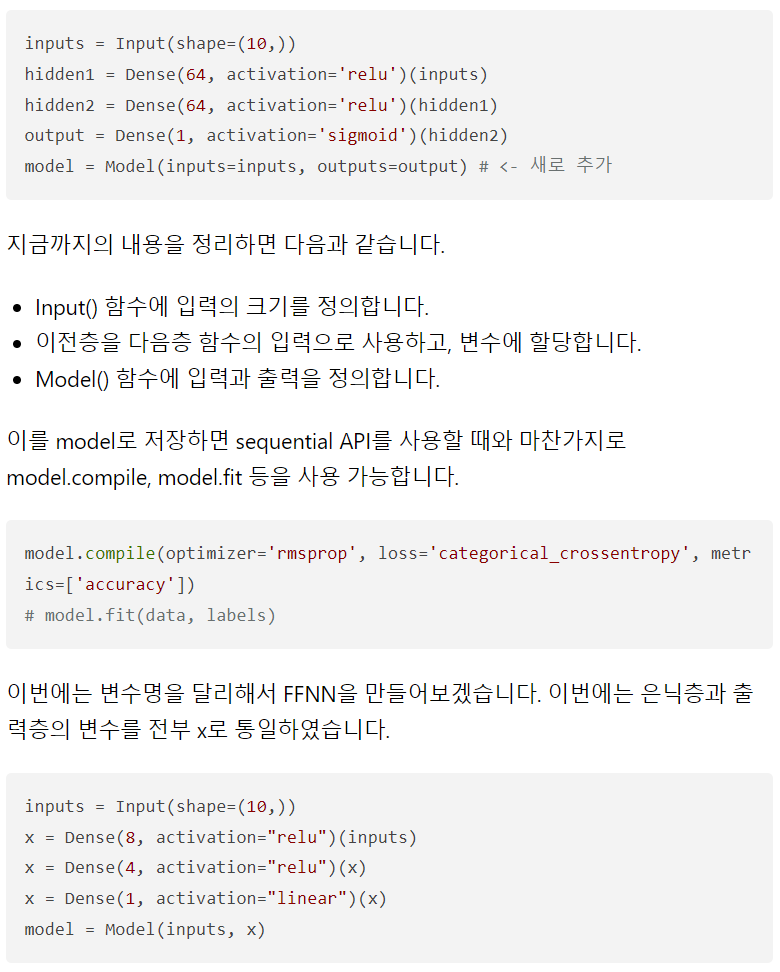

2. 선형 회귀(Linear Regression)

Sequential API로 구현했던 선형 회귀를 Functional API로 구현해봅시다.

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 465ms/step - loss: 4444.9316 - mse: 4444.9316
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 548.0392 - mse: 548.0392
Epoch 3/300
1/1 [==============================] - 0s 18ms/step - loss: 68.5544 - mse: 68.5544
Epoch 4/300
1/1 [==============================] - 0s 22ms/step - loss: 9.5558 - mse: 9.5558
Epoch 5/300
1/1 [==============================] - 0s 19ms/step - loss: 2.2949 - mse: 2.2949
Epoch 6/300
1/1 [==============================] - 0s 24ms/step - loss: 1.3999 - mse: 1.3999
Epoch 7/300
1/1 [==============================] - 0s 14ms/step - loss: 1.2883 - mse: 1.2883
Epoch 8/300
1/1 [==============================] - 0s 19ms/step - loss: 1.2730 - mse: 1.2730
Epoch 9/300
1/1 [==============================] - 0s 20ms/step - loss: 1.2696 - mse: 1.2696
Epoch 10/300
1/1 [==============================] - 0s 28ms/step - loss: 1.2677 - mse: 1.2677
Epoch 11/300
1/1 [==============================] - 0s 1

3. 로지스틱 회귀(Logistic Regression)

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

4. 다중 입력을 받는 모델(model that accepts multiple inputs)

In [3]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[x.input, y.input], outputs=z)

5. RNN(Recurrence Neural Network) 은닉층 사용하기

In [4]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)